In [1]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from keras.layers import Input, Dense, Dropout
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout






In [2]:
df_crop = pd.read_csv('../input/crop-recommendation-dataset/Crop_recommendation.csv')
df_crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df_crop.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
df_crop['label'].nunique()


22

In [5]:
df_crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
df_crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
df_crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [9]:
label_encode = LabelEncoder()

df_crop['label'] = label_encode.fit_transform(df_crop['label'])
crop_category = {index : label for index, label in enumerate(label_encode.classes_)}
crop_category

{0: 'apple',
 1: 'banana',
 2: 'blackgram',
 3: 'chickpea',
 4: 'coconut',
 5: 'coffee',
 6: 'cotton',
 7: 'grapes',
 8: 'jute',
 9: 'kidneybeans',
 10: 'lentil',
 11: 'maize',
 12: 'mango',
 13: 'mothbeans',
 14: 'mungbean',
 15: 'muskmelon',
 16: 'orange',
 17: 'papaya',
 18: 'pigeonpeas',
 19: 'pomegranate',
 20: 'rice',
 21: 'watermelon'}

In [10]:
df_crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


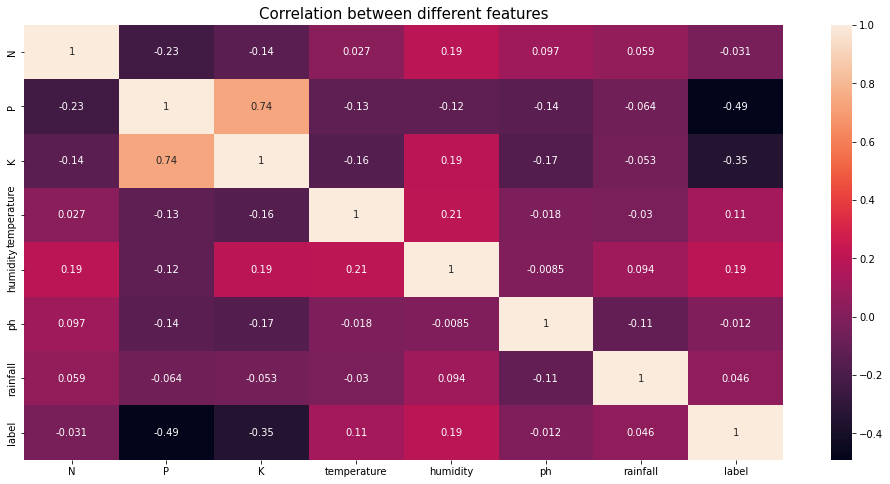

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(17, 8))
sns.heatmap(df_crop.corr(), annot=True )
plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [12]:
X = df_crop.drop('label', axis = 1)
y = df_crop['label']

In [13]:
crop_summary = pd.pivot_table(df_crop,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
0,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
1,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
2,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
3,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
4,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


In [14]:
X = df_crop.drop('label', axis = 1)
y = df_crop['label']

In [15]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [16]:
X.shape

(2200, 7, 1)

In [17]:
y = y.to_numpy()
y = y.reshape(y.shape[0], 1)
y.shape

(2200, 1)

In [18]:
print('Loading data...')
X_train, X_test, y_train, y_test = tts(X, y, train_size = 0.80)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

Loading data...
1760 train sequences
440 test sequences


In [19]:
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=True, input_shape=(8, 1)))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(22, activation='softmax'))

2022-11-07 13:18:26.325752: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 13:18:26.420263: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 13:18:26.421142: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 13:18:26.422992: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [20]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='/kaggle/working/best_model.h5',
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    mode='min'
)

In [21]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

In [22]:
batch_size = 64
epochs = 100

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs,
    callbacks=checkpoint)

2022-11-07 13:18:29.462434: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
22/22 [==============================] - 4s 39ms/step - loss: 2.8412 - accuracy: 0.1413 - val_loss: 2.3770 - val_accuracy: 0.2926
Epoch 2/100
22/22 [==============================] - 0s 21ms/step - loss: 1.9020 - accuracy: 0.4091 - val_loss: 1.0706 - val_accuracy: 0.6705
Epoch 3/100
22/22 [==============================] - 0s 21ms/step - loss: 0.7250 - accuracy: 0.7777 - val_loss: 0.3886 - val_accuracy: 0.8807
Epoch 4/100
22/22 [==============================] - 0s 20ms/step - loss: 0.4647 - accuracy: 0.8601 - val_loss: 0.4061 - val_accuracy: 0.8636
Epoch 5/100
22/22 [==============================] - 0s 22ms/step - loss: 0.2531 - accuracy: 0.9190 - val_loss: 0.1822 - val_accuracy: 0.9375
Epoch 6/100
22/22 [==============================] - 1s 31ms/step - loss: 0.1779 - accuracy: 0.9418 - val_loss: 0.1681 - val_accuracy: 0.9460
Epoch 7/100
22/22 [==============================] - 0s 20ms/step - loss: 0.1302 - accuracy: 0.9602 - val_loss: 0.1772 - val_accuracy: 0.9432
Epoch 

In [23]:
# inputs = tf.random.normal([32, 10, 8])
# lstm = tf.keras.layers.LSTM(50)
# output = lstm(inputs)
# print(output.shape)

In [24]:
model.evaluate(X_test, y_test)


14/14 [==============================] - 0s 5ms/step - loss: 0.0533 - accuracy: 0.9795


[0.05329905450344086, 0.9795454740524292]

In [25]:
y_pred = model.predict(X_test)


In [26]:
y_pred.shape


(440, 22)

In [27]:
from sklearn.metrics import classification_report

cols = crop_category.keys()

df_preds = pd.DataFrame(y_pred, columns=cols)

df_preds.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2.011594e-05,2.213407e-09,1.956594e-07,9.333886e-11,1.899583e-05,1.935369e-08,3.154301e-07,4.869404e-06,3.131222e-11,5.333306e-13,...,6.828658e-06,1.234690e-05,8.493334e-05,4.766914e-13,1.607232e-03,8.677662e-08,1.829197e-08,9.982440e-01,2.572246e-15,6.149074e-13
1,1.953397e-12,1.012891e-08,6.700071e-11,1.652283e-16,7.727381e-12,3.208104e-13,4.501798e-09,6.106508e-13,1.899942e-09,5.118810e-12,...,2.878453e-13,5.022574e-11,6.872788e-07,9.993510e-01,5.838005e-04,1.223979e-08,6.318812e-05,4.281111e-13,2.147229e-08,5.838219e-07
2,1.922847e-06,5.257402e-11,9.620531e-16,5.216543e-13,7.621585e-26,3.038292e-10,6.439836e-06,9.999917e-01,9.242564e-22,1.048034e-12,...,1.380412e-13,1.553531e-14,2.112658e-15,1.219495e-20,7.048604e-13,2.065959e-12,8.105910e-15,6.053234e-17,8.671386e-17,1.140467e-16
3,9.999847e-01,6.311989e-06,1.501612e-16,6.246140e-09,7.091731e-18,6.150705e-11,5.403012e-07,8.419458e-06,4.370241e-17,4.129277e-15,...,6.862114e-12,7.550647e-15,3.313452e-11,3.317508e-17,1.358626e-13,2.184019e-10,1.427437e-15,2.119682e-08,5.692258e-19,4.940048e-13
4,2.583278e-14,3.823117e-19,1.004113e-23,6.060345e-20,1.000000e+00,1.667374e-14,1.180169e-13,6.081846e-17,5.682300e-19,1.558189e-21,...,1.370413e-09,7.217910e-13,4.438542e-15,1.079726e-19,3.320231e-09,3.188355e-20,2.433831e-20,5.974338e-12,2.221071e-21,4.580339e-25


In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Dark2):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    # set the size of the figure here
    plt.figure(figsize=(15,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=80) # set x-axis text angle here
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [29]:
b =  y_pred.argmax(axis=1)
cm = confusion_matrix(y_test, b)

Confusion matrix, without normalization
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 26  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  

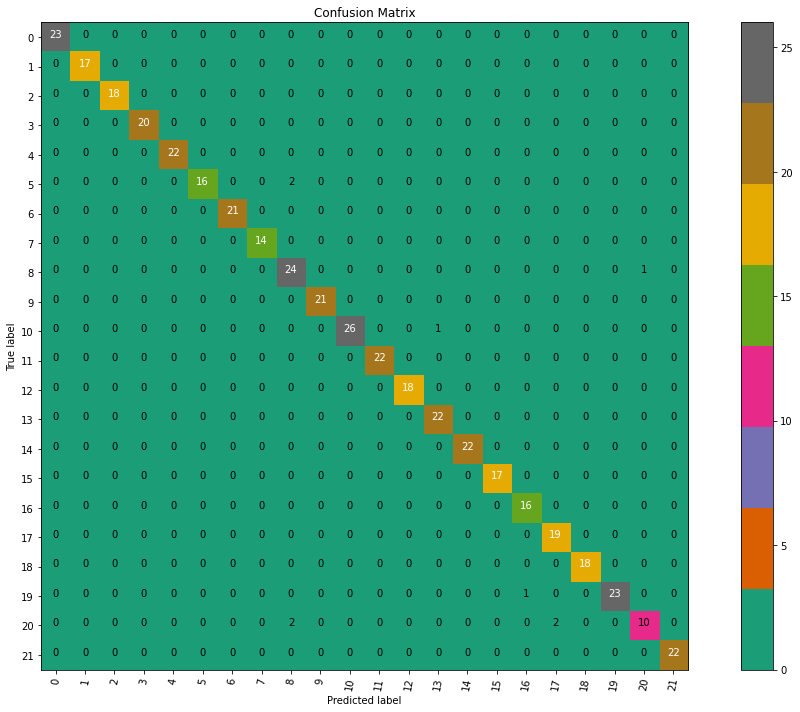

In [30]:
cm_plot_labels = cols

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test, b, multioutput='variance_weighted')

0.9718956849414809

In [32]:
model.save('my_crop.h5')

In [33]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_crop')

2022-11-07 13:19:26.792484: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
